In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
print('ce dataset contient: {} lignes et {} colonnes'.format(df.shape[0], df.shape[1]))

ce dataset contient: 1000 lignes et 16 colonnes


In [4]:
print('le dataset contient les colonnes suivantes:')
for key in df.keys():
    print(key)

le dataset contient les colonnes suivantes:
Poster_Link
Series_Title
Released_Year
Certificate
Runtime
Genre
IMDB_Rating
Overview
Meta_score
Director
Star1
Star2
Star3
Star4
No_of_Votes
Gross


In [5]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [6]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
df = df.rename(columns={'Series_Title':'Title'})

## Nettoyage et Mise en forme des données

- Released_Year devrait être un float
- runtime doit être nettoyé pour devenir un float
- Gross devrait être également un float

### Released_Year

In [8]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Released_Year'].dtypes

dtype('float64')

### Runtime

In [9]:
df['Runtime'].head()

0    142 min
1    175 min
2    152 min
3    202 min
4     96 min
Name: Runtime, dtype: object

In [10]:
df['Runtime'] = df['Runtime'].str.replace('min', '')
df['Runtime'].head()

0    142 
1    175 
2    152 
3    202 
4     96 
Name: Runtime, dtype: object

In [11]:
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df['Runtime'].isnull().sum()

np.int64(0)

In [12]:
df['Runtime'].dtypes

dtype('int64')

### Gross

In [13]:
df['Gross'] = df['Gross'].str.replace(',', '')

In [14]:
df['Gross'].head()

0     28341469
1    134966411
2    534858444
3     57300000
4      4360000
Name: Gross, dtype: object

In [15]:
df['Gross'].isnull().sum()

np.int64(169)

In [16]:
df['Gross'] = pd.to_numeric(df['Gross'], errors = 'coerce')
df['Gross'] = df['Gross'].replace(np.nan, 0)

In [17]:
df['Gross'].isnull().sum()

np.int64(0)

In [18]:
df.dtypes

Poster_Link       object
Title             object
Released_Year    float64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [19]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,1000.000000,1000.000000,843.000000,1.000000e+03,1.000000e+03
mean,1991.217217,122.891000,7.949300,77.971530,2.736929e+05,5.653688e+07
std,23.297025,28.093671,0.275491,12.376099,3.273727e+05,1.032382e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,0.000000e+00
25%,1976.000000,103.000000,7.700000,70.000000,5.552625e+04,4.457098e+05
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,1.070275e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.741612e+05,6.153989e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


## Enter the dataframe into a sqlite3 database

In [20]:
%reload_ext sql

con = sqlite3.connect('movies.db')
cur = con.cursor()

df.to_sql('MOVIES', con, if_exists='replace', index=False, method='multi')

%sql sqlite:///movies.db

In [21]:
%%sql
select *
from movies
limit 3;

 * sqlite:///movies.db
Done.


Poster_Link,Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
"https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg",The Shawshank Redemption,1994.0,A,142,Drama,9.3,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
"https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
"https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg",The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


## Exploratory Data Analysis

In [22]:
numerical_attributes = ['Released_Year', 'Runtime', 'IMDB_Rating', 'No_of_Votes', 'Gross']
df[numerical_attributes].corr()

,Released_Year,Runtime,IMDB_Rating,No_of_Votes,Gross
Released_Year,1.000000,0.165807,-0.131053,0.241785,0.250435
Runtime,0.165807,1.000000,0.243096,0.173264,0.143928
IMDB_Rating,-0.131053,0.243096,1.000000,0.494979,0.082381
No_of_Votes,0.241785,0.173264,0.494979,1.000000,0.602128
Gross,0.250435,0.143928,0.082381,0.602128,1.000000


array([[<Axes: title={'center': 'Released_Year'}>,
        <Axes: title={'center': 'Runtime'}>],
       [<Axes: title={'center': 'IMDB_Rating'}>,
        <Axes: title={'center': 'No_of_Votes'}>],
       [<Axes: title={'center': 'Gross'}>, <Axes: >]], dtype=object)

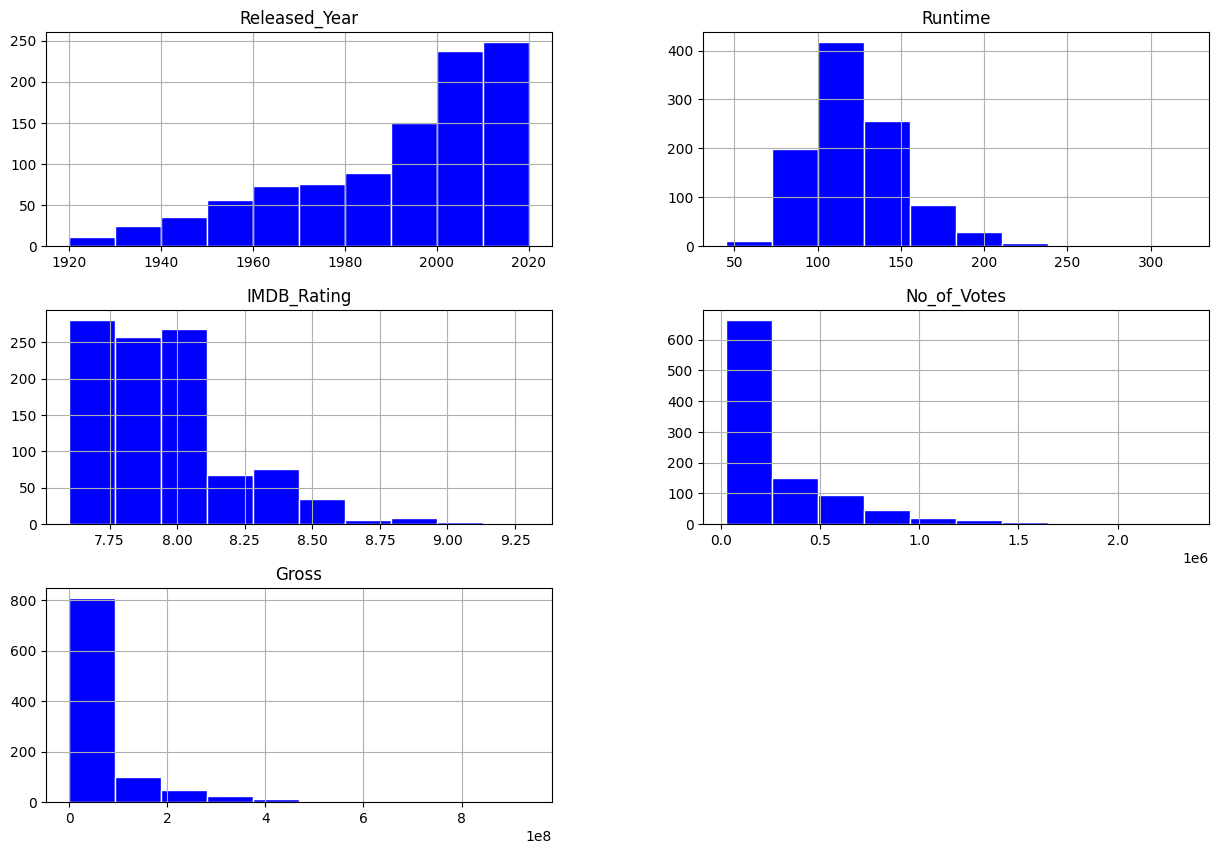

In [23]:
df[numerical_attributes].hist(figsize=(15,10), color='blue', edgecolor='white', layout=(3,2))

### Find top voted movies and features about those films

In [24]:
top_voted_movies = df.sort_values(['No_of_Votes'], ascending=False).head(6)

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\1171098233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='No_of_Votes', data=top_voted_movies, palette='plasma')


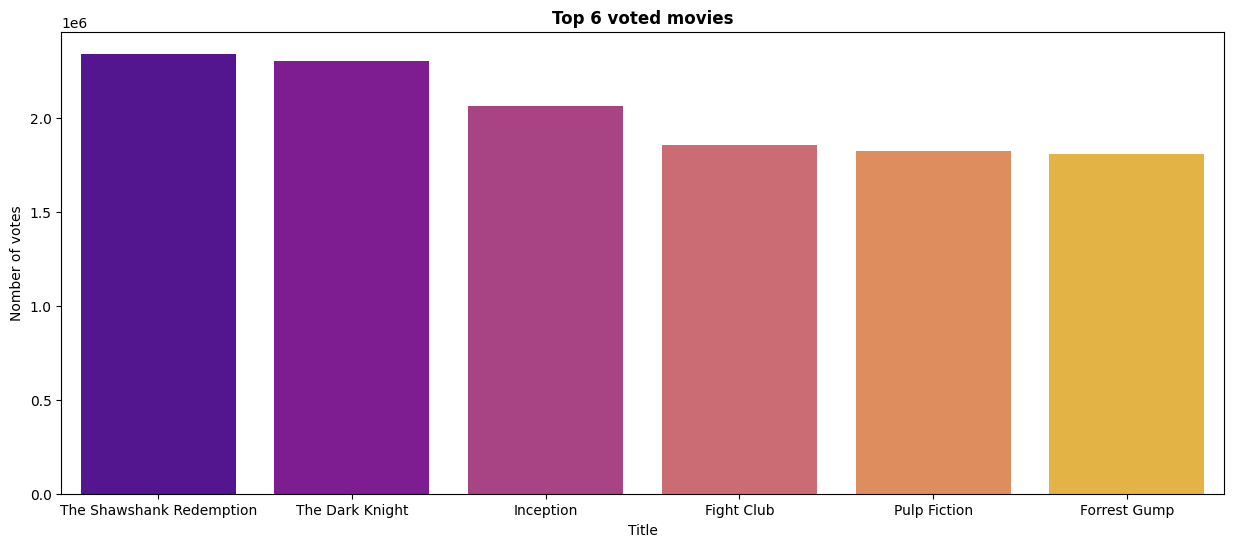

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x='Title', y='No_of_Votes', data=top_voted_movies, palette='plasma')
plt.ylabel('Nomber of votes')
plt.title('Top 6 voted movies', weight='bold')
plt.show()

In [26]:
%%sql
select Title, No_of_Votes
from movies
order by No_of_Votes DESC
limit 6;

 * sqlite:///movies.db
Done.


Title,No_of_Votes
The Shawshank Redemption,2343110
The Dark Knight,2303232
Inception,2067042
Fight Club,1854740
Pulp Fiction,1826188
Forrest Gump,1809221


#### IMDB Rating for top voted movies

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\2121421092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Title', y='IMDB_Rating', data=top_voted_movies, palette='magma')


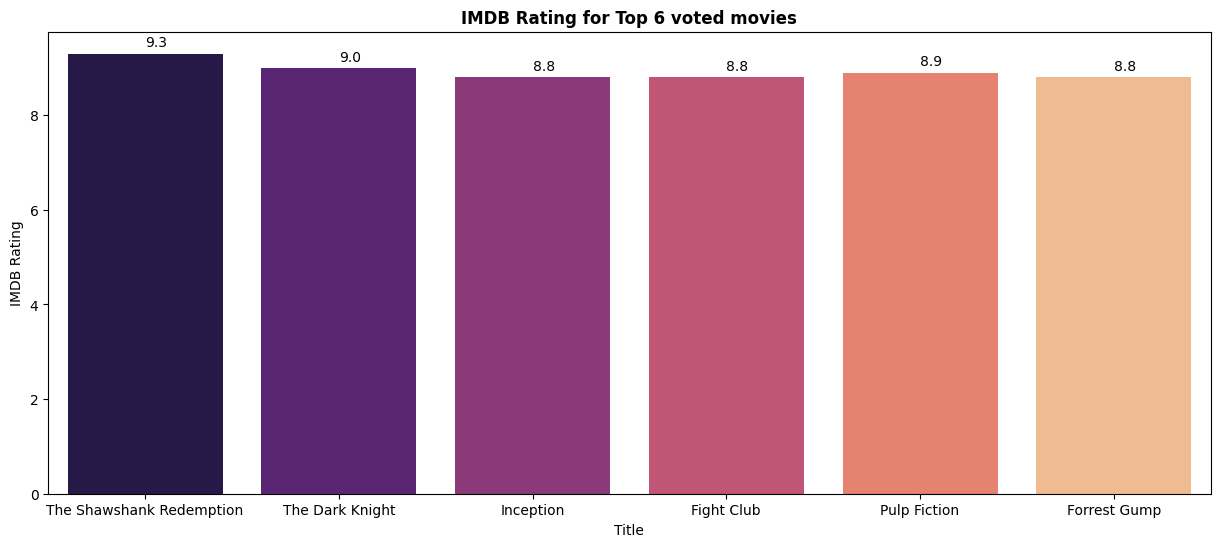

In [27]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Title', y='IMDB_Rating', data=top_voted_movies, palette='magma')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                xytext=(0,5),
                textcoords='offset points')

plt.ylabel('IMDB Rating')
plt.title('IMDB Rating for Top 6 voted movies', weight='bold')
plt.show()

In [28]:
%%sql
select Title, IMDB_Rating
from movies
order by No_of_Votes DESC
limit 6;

 * sqlite:///movies.db
Done.


Title,IMDB_Rating
The Shawshank Redemption,9.3
The Dark Knight,9.0
Inception,8.8
Fight Club,8.8
Pulp Fiction,8.9
Forrest Gump,8.8


#### Meta score for top voted movies

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\1688743468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Title', y='Meta_score', data=top_voted_movies, palette='magma')


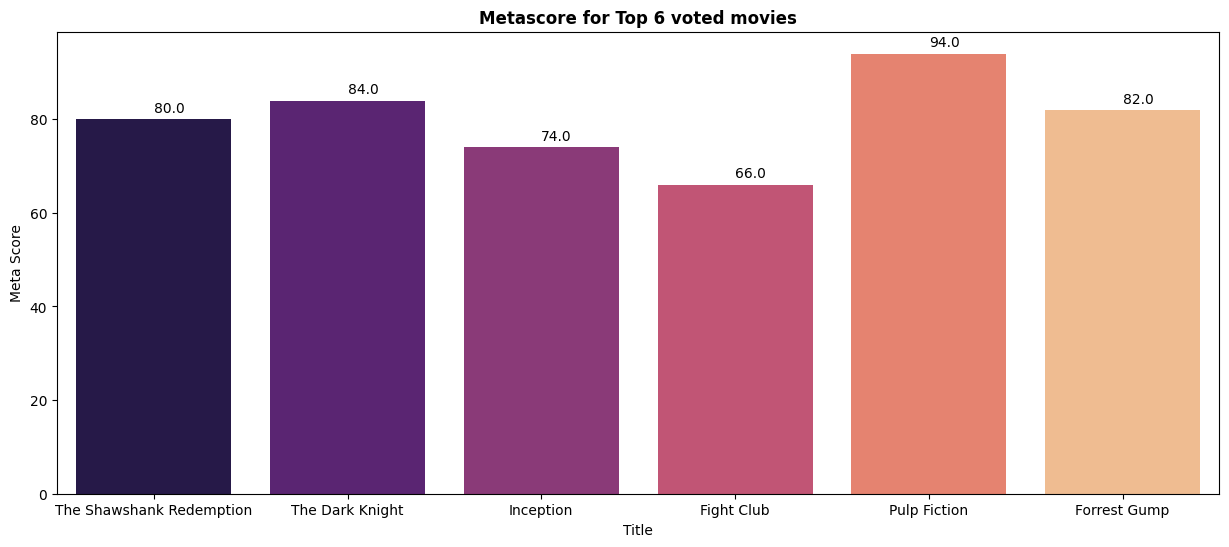

In [29]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Title', y='Meta_score', data=top_voted_movies, palette='magma')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                xytext=(0,5),
                textcoords='offset points')

plt.ylabel('Meta Score')
plt.title('Metascore for Top 6 voted movies', weight='bold')
plt.show()

In [30]:
%%sql
select Title, Meta_score
from movies
order by No_of_Votes DESC
limit 6;

 * sqlite:///movies.db
Done.


Title,Meta_score
The Shawshank Redemption,80.0
The Dark Knight,84.0
Inception,74.0
Fight Club,66.0
Pulp Fiction,94.0
Forrest Gump,82.0


#### Gross of top voted movies

In [31]:
df.sort_values('Gross', ascending=False)[['Title', 'Gross']].head()

,Title,Gross
477,Star Wars: Episode VII - The Force Awakens,936662225.0
59,Avengers: Endgame,858373000.0
623,Avatar,760507625.0
60,Avengers: Infinity War,678815482.0
652,Titanic,659325379.0


C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\2888495961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Title', y='Gross', data=top_voted_movies, palette='magma')


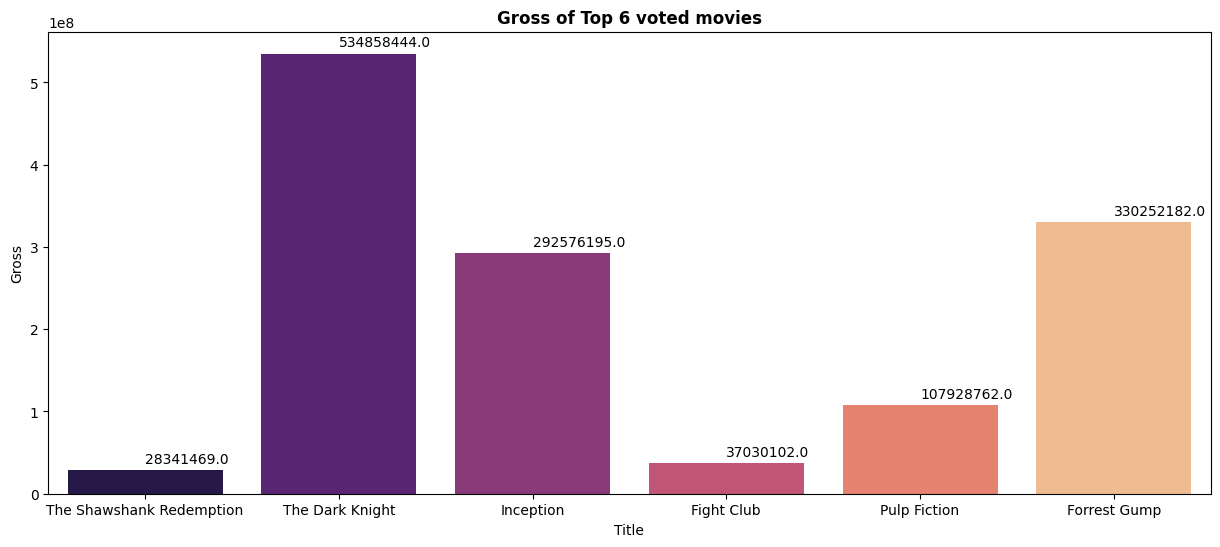

In [32]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Title', y='Gross', data=top_voted_movies, palette='magma')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                xytext=(0,5),
                textcoords='offset points')

plt.ylabel('Gross')
plt.title('Gross of Top 6 voted movies', weight='bold')
plt.show()

In [33]:
%%sql
select Title, Gross
from movies
order by No_of_Votes desc
limit 6;

 * sqlite:///movies.db
Done.


Title,Gross
The Shawshank Redemption,28341469.0
The Dark Knight,534858444.0
Inception,292576195.0
Fight Club,37030102.0
Pulp Fiction,107928762.0
Forrest Gump,330252182.0


### Top Movies with highest Gross

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\766082004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gross[:7], x='Title', y='Gross', palette='magma')


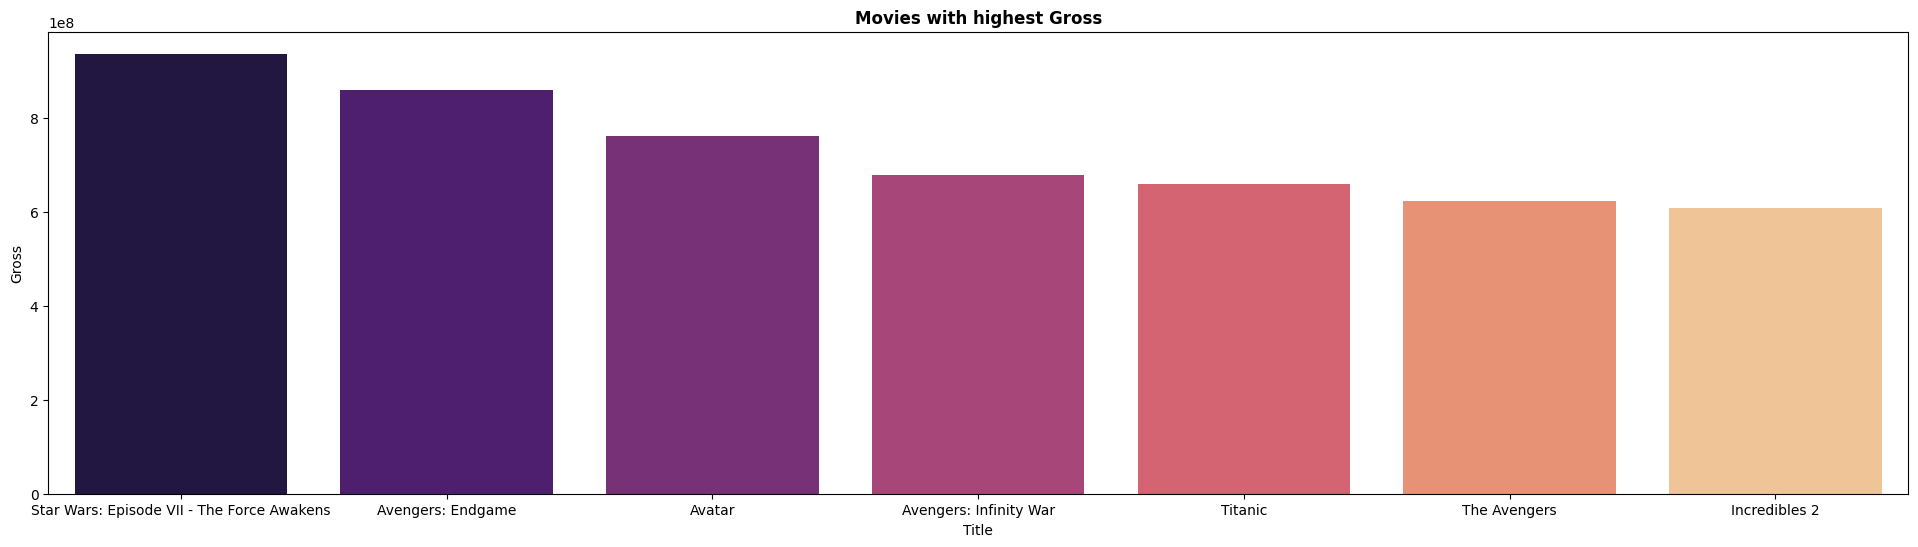

In [34]:
top_gross = df.sort_values('Gross', ascending=False)

plt.figure(figsize=(24,6))
sns.barplot(data=top_gross[:7], x='Title', y='Gross', palette='magma')
plt.title('Movies with highest Gross', weight='bold')
plt.show()

In [35]:
%%sql
select Title, Gross
from movies
order by Gross desc
limit 7;

 * sqlite:///movies.db
Done.


Title,Gross
Star Wars: Episode VII - The Force Awakens,936662225.0
Avengers: Endgame,858373000.0
Avatar,760507625.0
Avengers: Infinity War,678815482.0
Titanic,659325379.0
The Avengers,623279547.0
Incredibles 2,608581744.0


### Number of movies released of top years

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\2152697760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nbr_movies_released, x='Released_Year', y='Title', palette='magma')


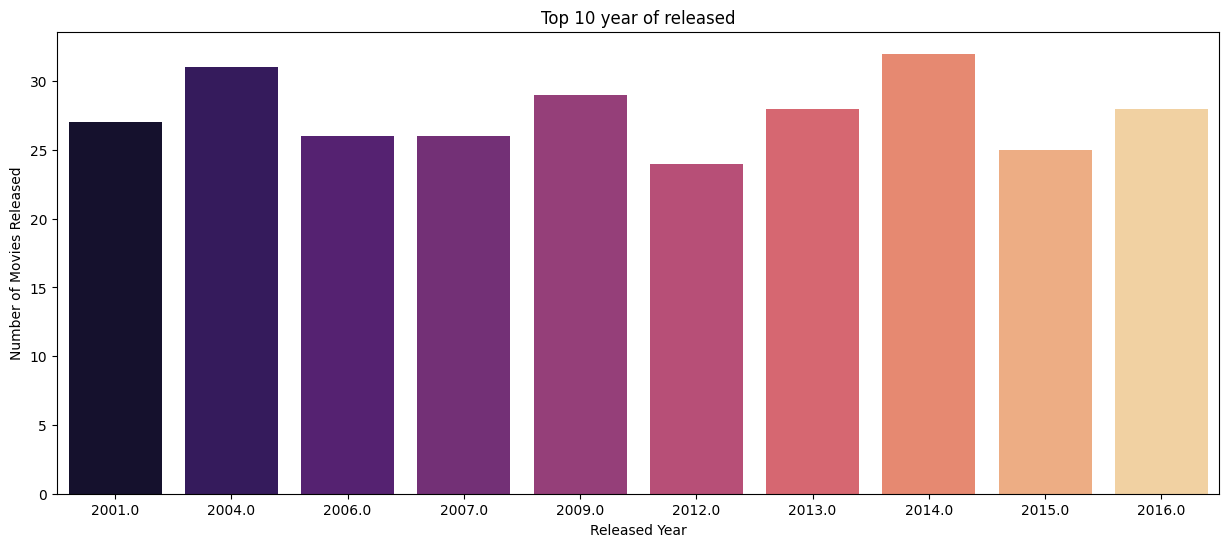

In [36]:
nbr_movies_released = df.groupby('Released_Year')['Title'].count().reset_index().sort_values('Title', ascending=False)[:10]
plt.figure(figsize=(15,6))
sns.barplot(data=nbr_movies_released, x='Released_Year', y='Title', palette='magma')
plt.xlabel('Released Year')
plt.ylabel('Number of Movies Released')
plt.title('Top 10 year of released')
plt.show()

In [37]:
%%sql
select Released_Year, count(Title) as Number_of_movies_released
from movies
group by Released_Year
order by Number_of_movies_released desc
limit 10;

 * sqlite:///movies.db
Done.


Released_Year,Number_of_movies_released
2014.0,32
2004.0,31
2009.0,29
2016.0,28
2013.0,28
2001.0,27
2007.0,26
2006.0,26
2015.0,25
2012.0,24


### Top directors with most released movies

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\2055745063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Director', y='count', data=df_director, palette='magma')


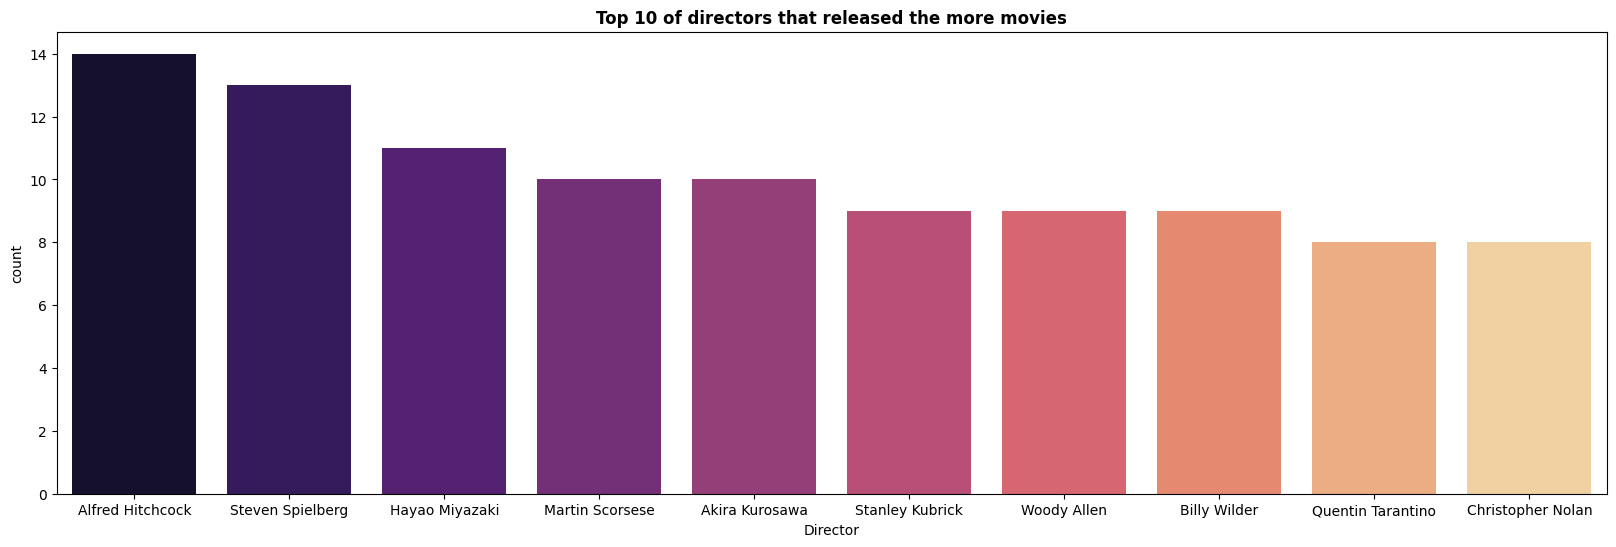

In [38]:
df_director = df['Director'].value_counts().reset_index()[:10]
plt.figure(figsize=(20,6))
sns.barplot(x='Director', y='count', data=df_director, palette='magma')
plt.title('Top 10 of directors that released the more movies', weight='bold')
plt.show()

In [39]:
%%sql
select Director, count(title) as Number_of_Movies
from movies
group by Director
order by Number_of_Movies desc
limit 10;

 * sqlite:///movies.db
Done.


Director,Number_of_Movies
Alfred Hitchcock,14
Steven Spielberg,13
Hayao Miyazaki,11
Martin Scorsese,10
Akira Kurosawa,10
Woody Allen,9
Stanley Kubrick,9
Billy Wilder,9
Quentin Tarantino,8
David Fincher,8


### Top Directors with the highest cumulated gross from their released movies

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\3414964034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_director_gross, x='Director', y='Gross', palette='magma')


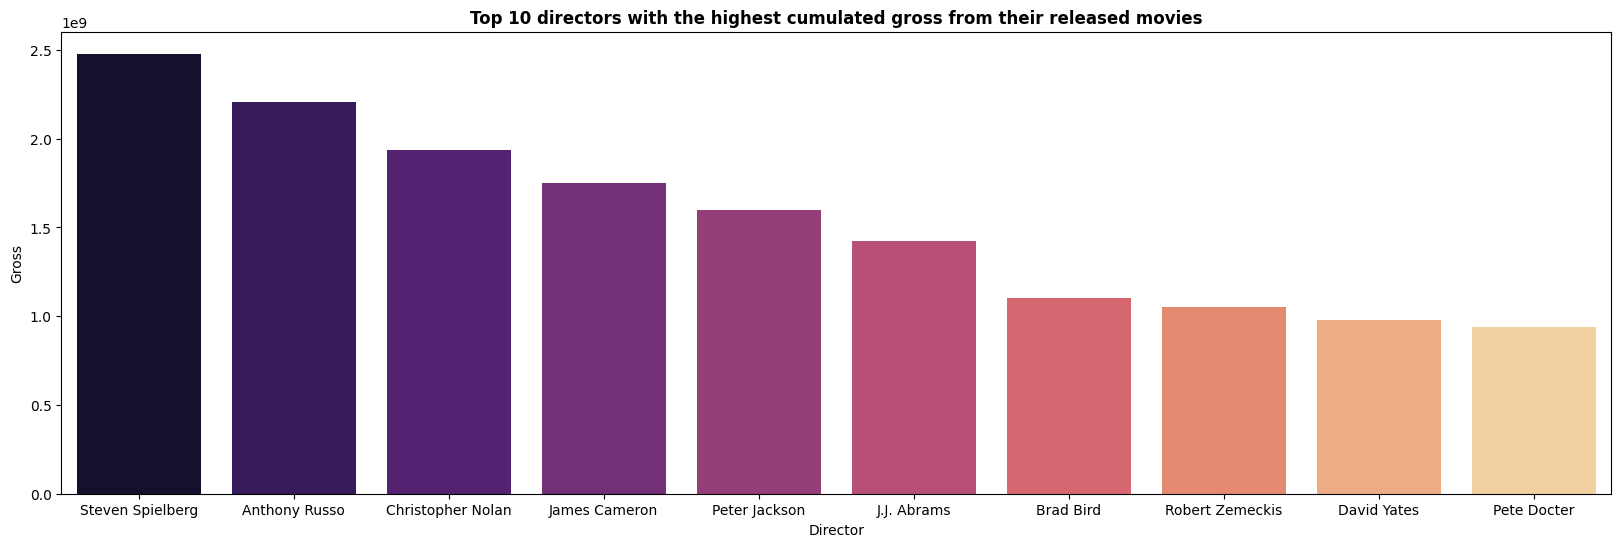

In [40]:
df_director_gross = df.groupby('Director')['Gross'].sum().reset_index().sort_values('Gross', ascending=False)[:10]
plt.figure(figsize=(20,6))
sns.barplot(data=df_director_gross, x='Director', y='Gross', palette='magma')
plt.title('Top 10 directors with the highest cumulated gross from their released movies', weight='bold')
plt.show()

In [41]:
%%sql
select Director, sum(Gross) as Cumulated_Gross
from movies
group by Director
order by Cumulated_Gross desc
limit 10;

 * sqlite:///movies.db
Done.


Director,Cumulated_Gross
Steven Spielberg,2478133165.0
Anthony Russo,2205039403.0
Christopher Nolan,1937454106.0
James Cameron,1748236602.0
Peter Jackson,1597312443.0
J.J. Abrams,1423170905.0
Brad Bird,1099627795.0
Robert Zemeckis,1049446456.0
David Yates,978953721.0
Pete Docter,939382131.0


### Most commom movie runtime

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\1880398981.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Runtime'], bins=30)


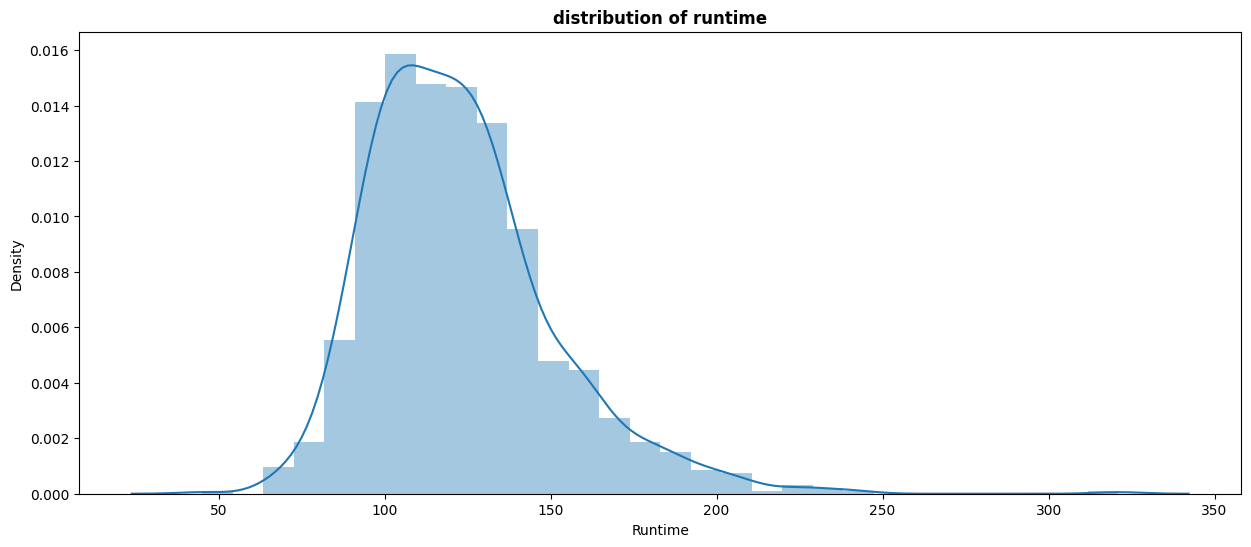

In [42]:
plt.figure(figsize=(15,6))
sns.distplot(df['Runtime'], bins=30)
plt.title('distribution of runtime', weight='bold')
plt.show()

### Stars that appeared the most in movies

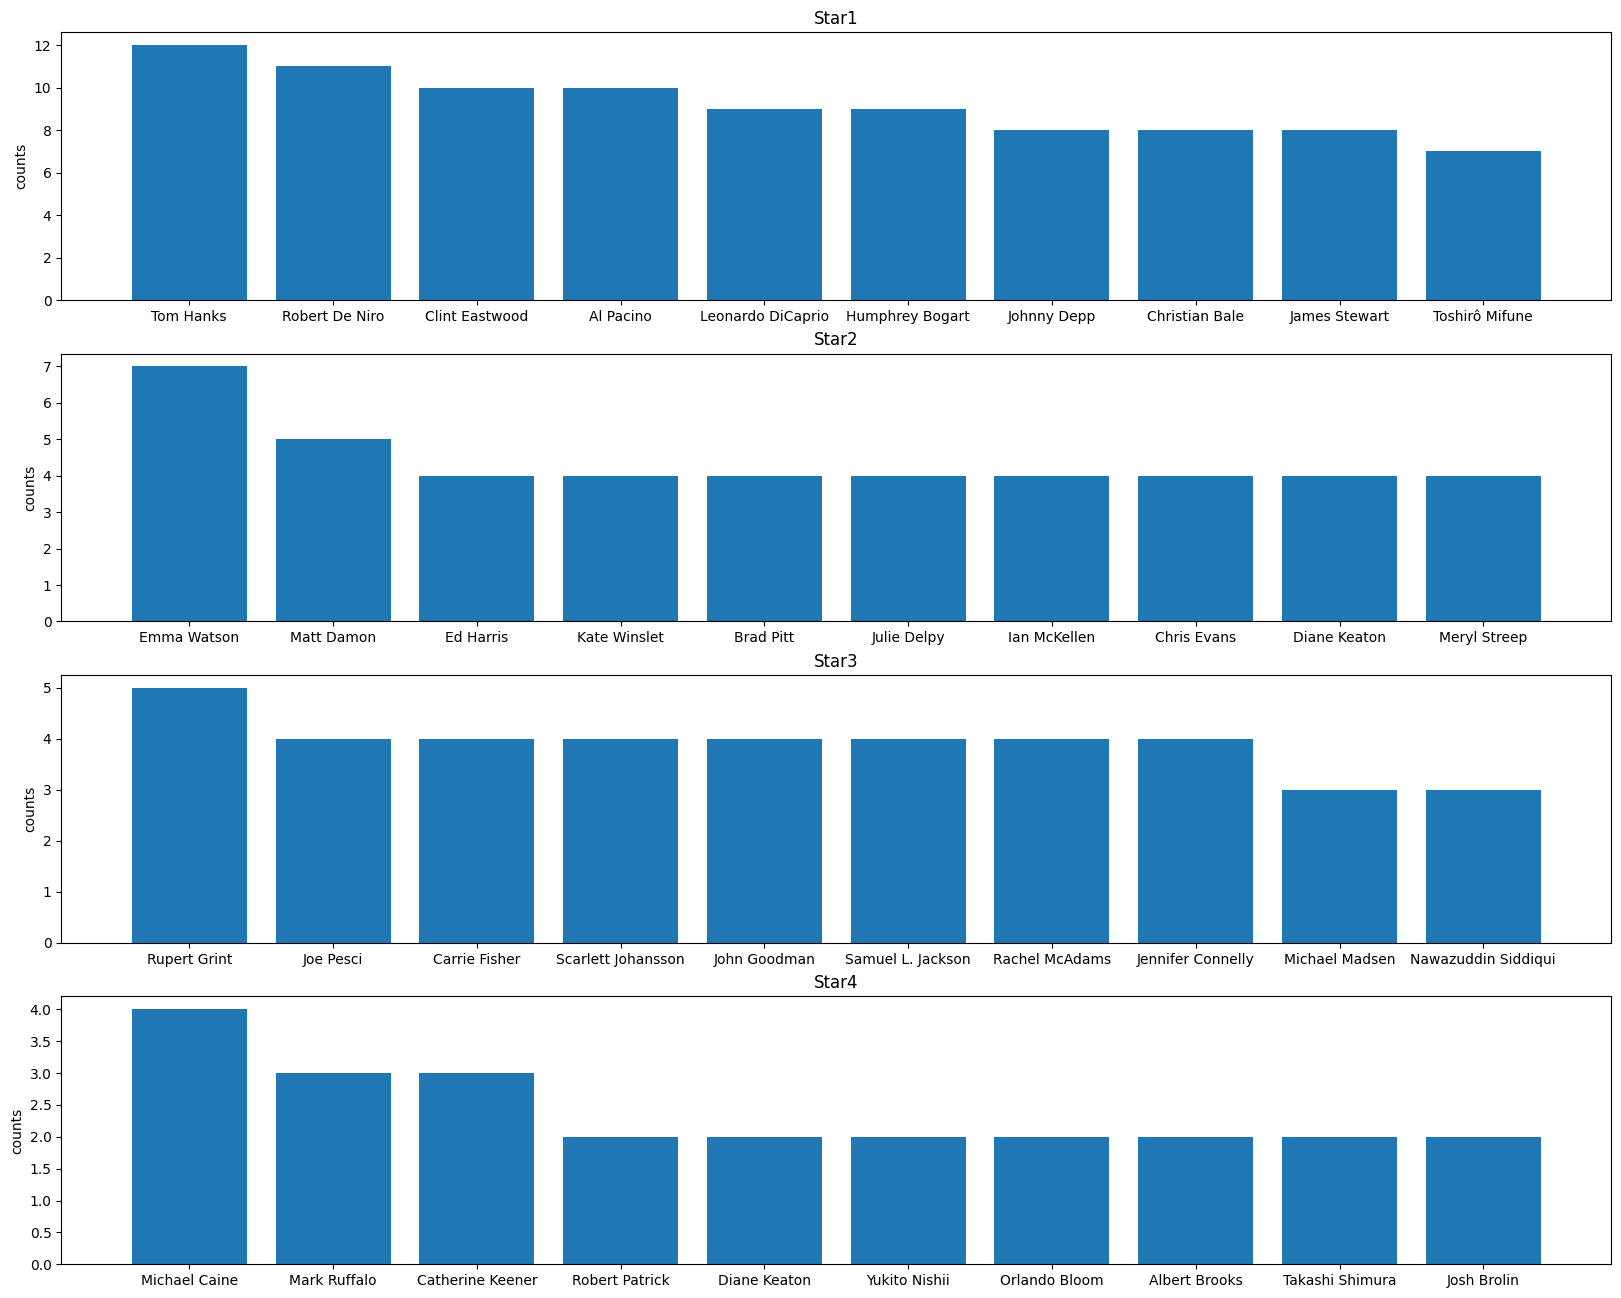

In [43]:
fig, axs=plt.subplots(4,1,figsize=(20,16))
ax = 0
stars=['Star1', 'Star2', 'Star3', 'Star4']
for star in stars:
    df_star = df[star].value_counts()[:10].reset_index()
    axs[ax].bar(df_star[star], df_star['count'])
    axs[ax].set_title(star)
    axs[ax].set_ylabel('counts')
    ax+=1

In [44]:
%%sql
select Star1, count(Title) as Appearance_Number
from movies
group by Star1
order by Appearance_Number desc
limit 10;

 * sqlite:///movies.db
Done.


Star1,Appearance_Number
Tom Hanks,12
Robert De Niro,11
Clint Eastwood,10
Al Pacino,10
Leonardo DiCaprio,9
Humphrey Bogart,9
Johnny Depp,8
James Stewart,8
Christian Bale,8
Toshirô Mifune,7


### Most delivered certificates

In [45]:
df['Certificate'] = df['Certificate'].replace(np.nan, 'No Certificate')
df['Certificate'].isnull().sum()

np.int64(0)

In [46]:
certificates = df[df['Certificate']!='No Certificate']
certificates.shape

(899, 16)

In [47]:
certificates = certificates['Certificate'].value_counts()

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\874760522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=certificates.index, y=certificates.values, palette='husl')


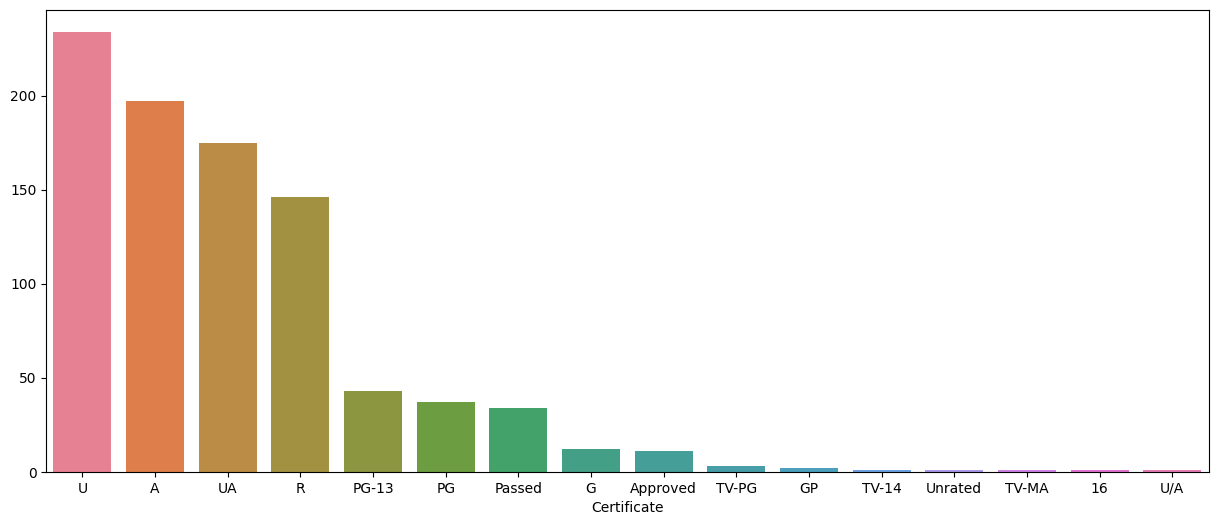

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(x=certificates.index, y=certificates.values, palette='husl')
plt.show()

In [49]:
%%sql
select Certificate, count(Certificate) as Number_of_Delivery
from movies
group by Certificate
order by Number_of_Delivery desc;

 * sqlite:///movies.db
Done.


Certificate,Number_of_Delivery
U,234
A,197
UA,175
R,146
PG-13,43
PG,37
Passed,34
G,12
Approved,11
TV-PG,3


### Most frequent genres in movies

In [50]:
genre = []
for x in df['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())
genre[:5]

['drama', 'crime', 'drama', 'action', 'crime']

In [51]:
genre_series = pd.Series(genre)
top_genre = genre_series.value_counts()[:10]

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_4228\321850280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genre.index, y=top_genre.values, palette='magma')


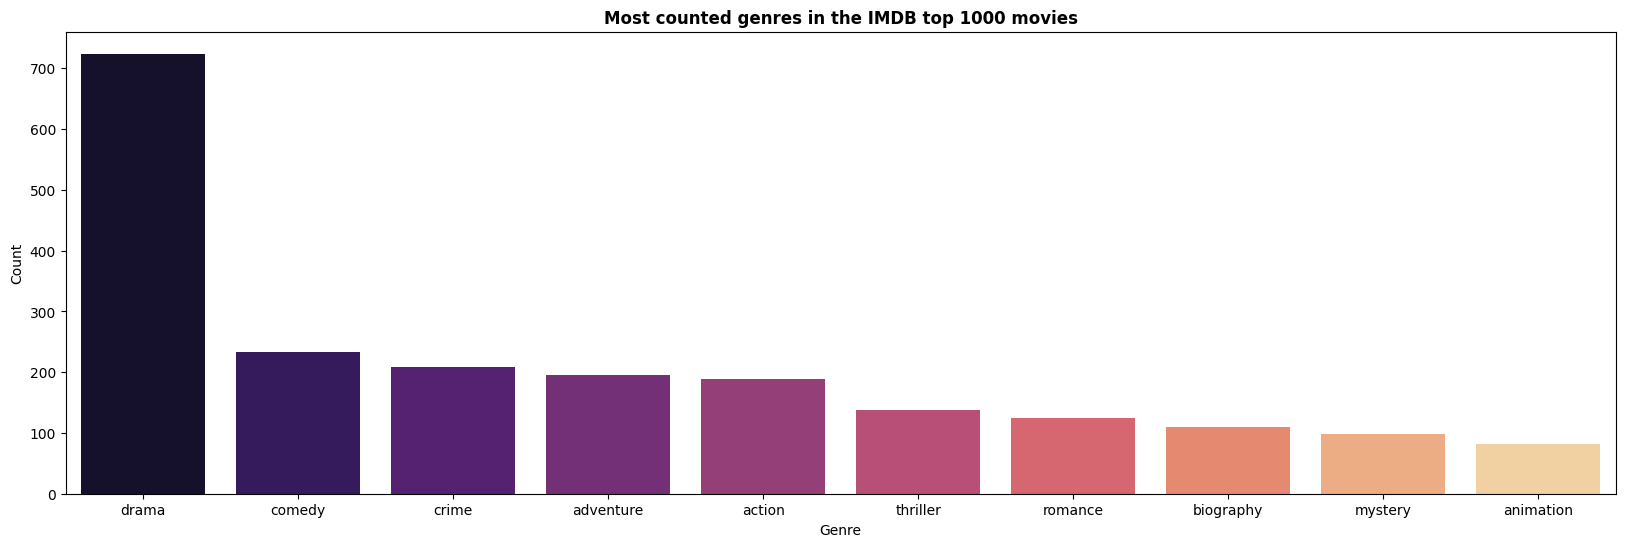

In [52]:
plt.figure(figsize=(20,6))
sns.barplot(x=top_genre.index, y=top_genre.values, palette='magma')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most counted genres in the IMDB top 1000 movies', weight='bold')
plt.show()

In [53]:
top_genre

drama        724
comedy       233
crime        209
adventure    196
action       189
thriller     137
romance      125
biography    109
mystery       99
animation     82
Name: count, dtype: int64

### Study of relationships between features

In [54]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,1000.000000,1000.000000,843.000000,1.000000e+03,1.000000e+03
mean,1991.217217,122.891000,7.949300,77.971530,2.736929e+05,5.653688e+07
std,23.297025,28.093671,0.275491,12.376099,3.273727e+05,1.032382e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,0.000000e+00
25%,1976.000000,103.000000,7.700000,70.000000,5.552625e+04,4.457098e+05
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,1.070275e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.741612e+05,6.153989e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [55]:
numerical_features = ['Released_Year', 'Runtime', 'IMDB_Rating', 'No_of_Votes', 'Gross']
numerical_df = df[numerical_features]

In [56]:
numerical_df.corr()

,Released_Year,Runtime,IMDB_Rating,No_of_Votes,Gross
Released_Year,1.000000,0.165807,-0.131053,0.241785,0.250435
Runtime,0.165807,1.000000,0.243096,0.173264,0.143928
IMDB_Rating,-0.131053,0.243096,1.000000,0.494979,0.082381
No_of_Votes,0.241785,0.173264,0.494979,1.000000,0.602128
Gross,0.250435,0.143928,0.082381,0.602128,1.000000


Relationships between features are not strong, but we can still observe the relationship between:
- Released_Year and Gross
- No_of_Votes and IMDB_Rating
- No_of_Votes and Gross

#### Released year vs Gross

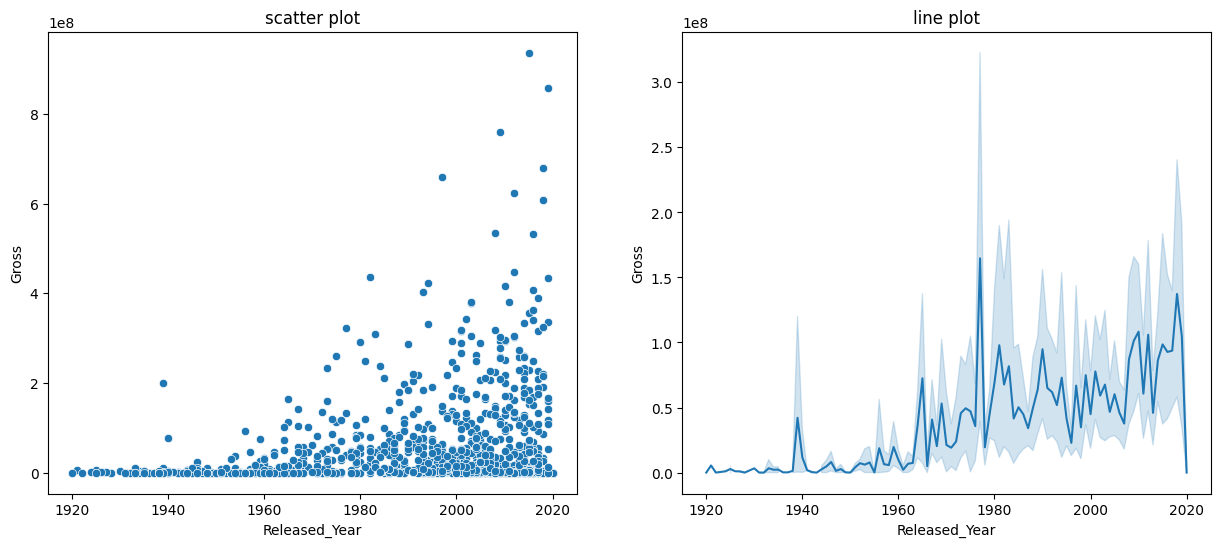

In [57]:
fig,axs = plt.subplots(1,2,figsize=(15,6))
sns.scatterplot(data=numerical_df, x='Released_Year', y='Gross', ax=axs[0])
sns.lineplot(data=numerical_df, x='Released_Year', y='Gross', ax=axs[1])
axs[0].set_title('scatter plot')
axs[1].set_title('line plot')
plt.show()

**--> The more time passes, the more a movie can generate revenue**

#### Number of Votes vs IMDB Rating

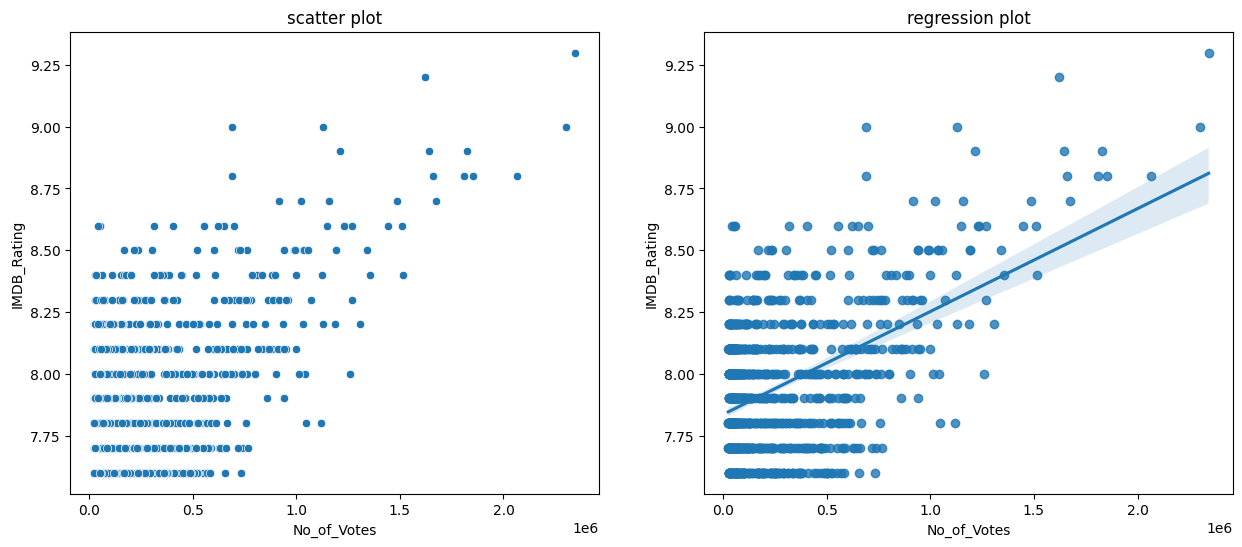

In [58]:
fig,axs = plt.subplots(1,2,figsize=(15,6))
sns.scatterplot(data=numerical_df, x='No_of_Votes', y='IMDB_Rating', ax=axs[0])
sns.regplot(data=numerical_df, x='No_of_Votes', y='IMDB_Rating', ax=axs[1])
axs[0].set_title('scatter plot')
axs[1].set_title('regression plot')
plt.show()

**--> The more votes a movie gets, the highest IMDB rating it receives**

#### Number of votes vs Gross

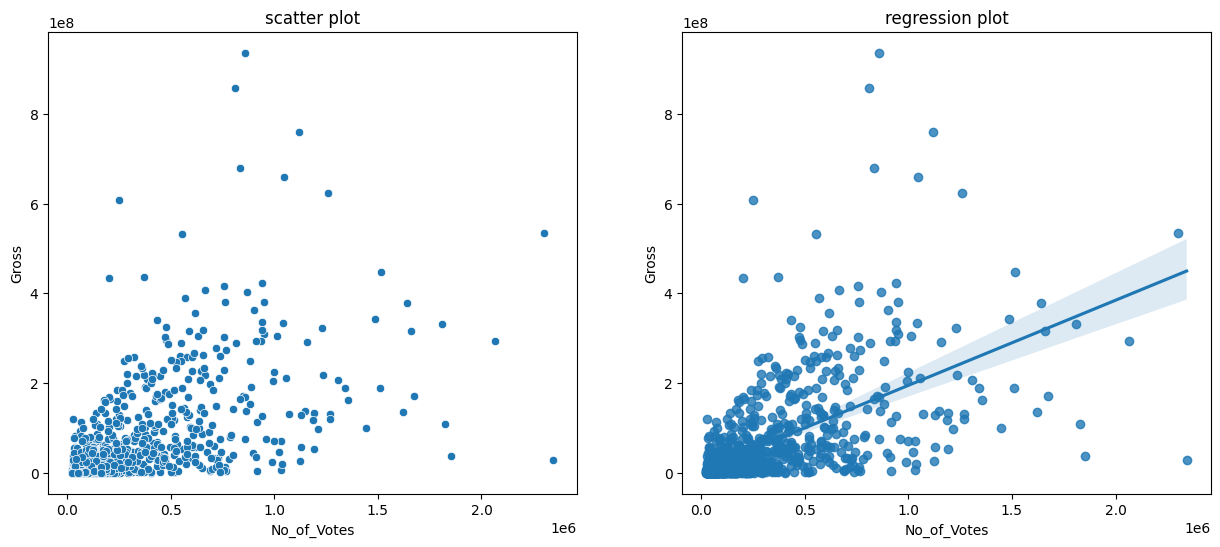

In [59]:
fig,axs = plt.subplots(1,2,figsize=(15,6))
sns.scatterplot(data=numerical_df, x='No_of_Votes', y='Gross', ax=axs[0])
sns.regplot(data=numerical_df, x='No_of_Votes', y='Gross', ax=axs[1])
axs[0].set_title('scatter plot')
axs[1].set_title('regression plot')
plt.show()

**--> the relationship is weak, but we can still conclude that if a movie receives a high number of votes, it is more likely to generate a higher revenue**